<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/C4_Architecture_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C4 Architecture Examples

In [1]:
#@title Install Diagrams
!pip install diagrams &> /dev/null

In [2]:
#@title Imports & Default Settings

from diagrams import Diagram
from diagrams.c4 import Person, Container, Database, System, SystemBoundary, Relationship
from diagrams.custom import Custom
from IPython.display import SVG, display, Image
from urllib import request

#@markdown ----------------------------------------------
#@markdown ## Imports 

#@markdown + https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/Repository%2Cpy
request.urlretrieve('https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/Repository%2Cpy', 'Repository.py')

#@markdown ----------------------------------------------
#@markdown ## Attributes

#@markdown + Graph Attributes
global_graph_attr = {
  "splines": "spline",
  "fontsize": "10",
  "bgcolor": "transparent"
}

#@markdown + Node Attributes
global_node_attr = {
  "fontsize": "8px",
  "width": "1.8"#,
  #"height": "1.4"

}

In [5]:
#@title Internet Banking System Context Diagram

#from content import Repository
##exec(open('Repository.py').read())
from Repository import OurSystems, OurPersonas, OurDataStores, OurExternalSystems

internet_banking_system_settings =  {
  "name": "Internet Banking System Context Diagram",
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** internet_banking_system_settings) as internet_banking_system_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + BankingCustomer
  customer = Person( **OurPersonas.BankingCustomer() )

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown System: Internet Banking System
  with SystemBoundary("Internet Banking System"):
    #@markdown + WebApp
    webapp = Container( **OurSystems.WebApp() )

    #@markdown + SPA
    spa = Container( **OurSystems.SPA() ) 

    #@markdown + MobileApp
    mobileapp = Container( **OurSystems.MobileApp() ) 

    #@markdown + API
    api = Container( **OurSystems.API() )

    #@markdown + OracleDB
    database = Database( **OurDataStores.OracleDB() )

    #@markdown + CustomA
    diagrams = Custom( **OurSystems.CustomA() )

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Email
  email = System( **OurExternalSystems.Email() )

  #@markdown + Mainframe
  mainframe = System( **OurExternalSystems.Mainframe() )

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  #@markdown Shown in code
  customer >> Relationship("Visits bigbank.com/ib using [HTTPS]") >> webapp
  customer >> Relationship("Views account balances, and makes payments using") >> [spa, mobileapp]
  webapp >> Relationship("Delivers to the customer's web browser") >> spa
  spa >> Relationship("Make API calls to [JSON/HTTPS]") >> api
  mobileapp >> Relationship("Make API calls to [JSON/HTTPS]") >> api

  api >> Relationship("reads from and writes to") >> database
  api >> Relationship("Sends email using [SMTP]") >> email
  api >> Relationship("Makes API calls to [XML/HTTPS]") >> mainframe
  customer << Relationship("Sends e-mails to") << email


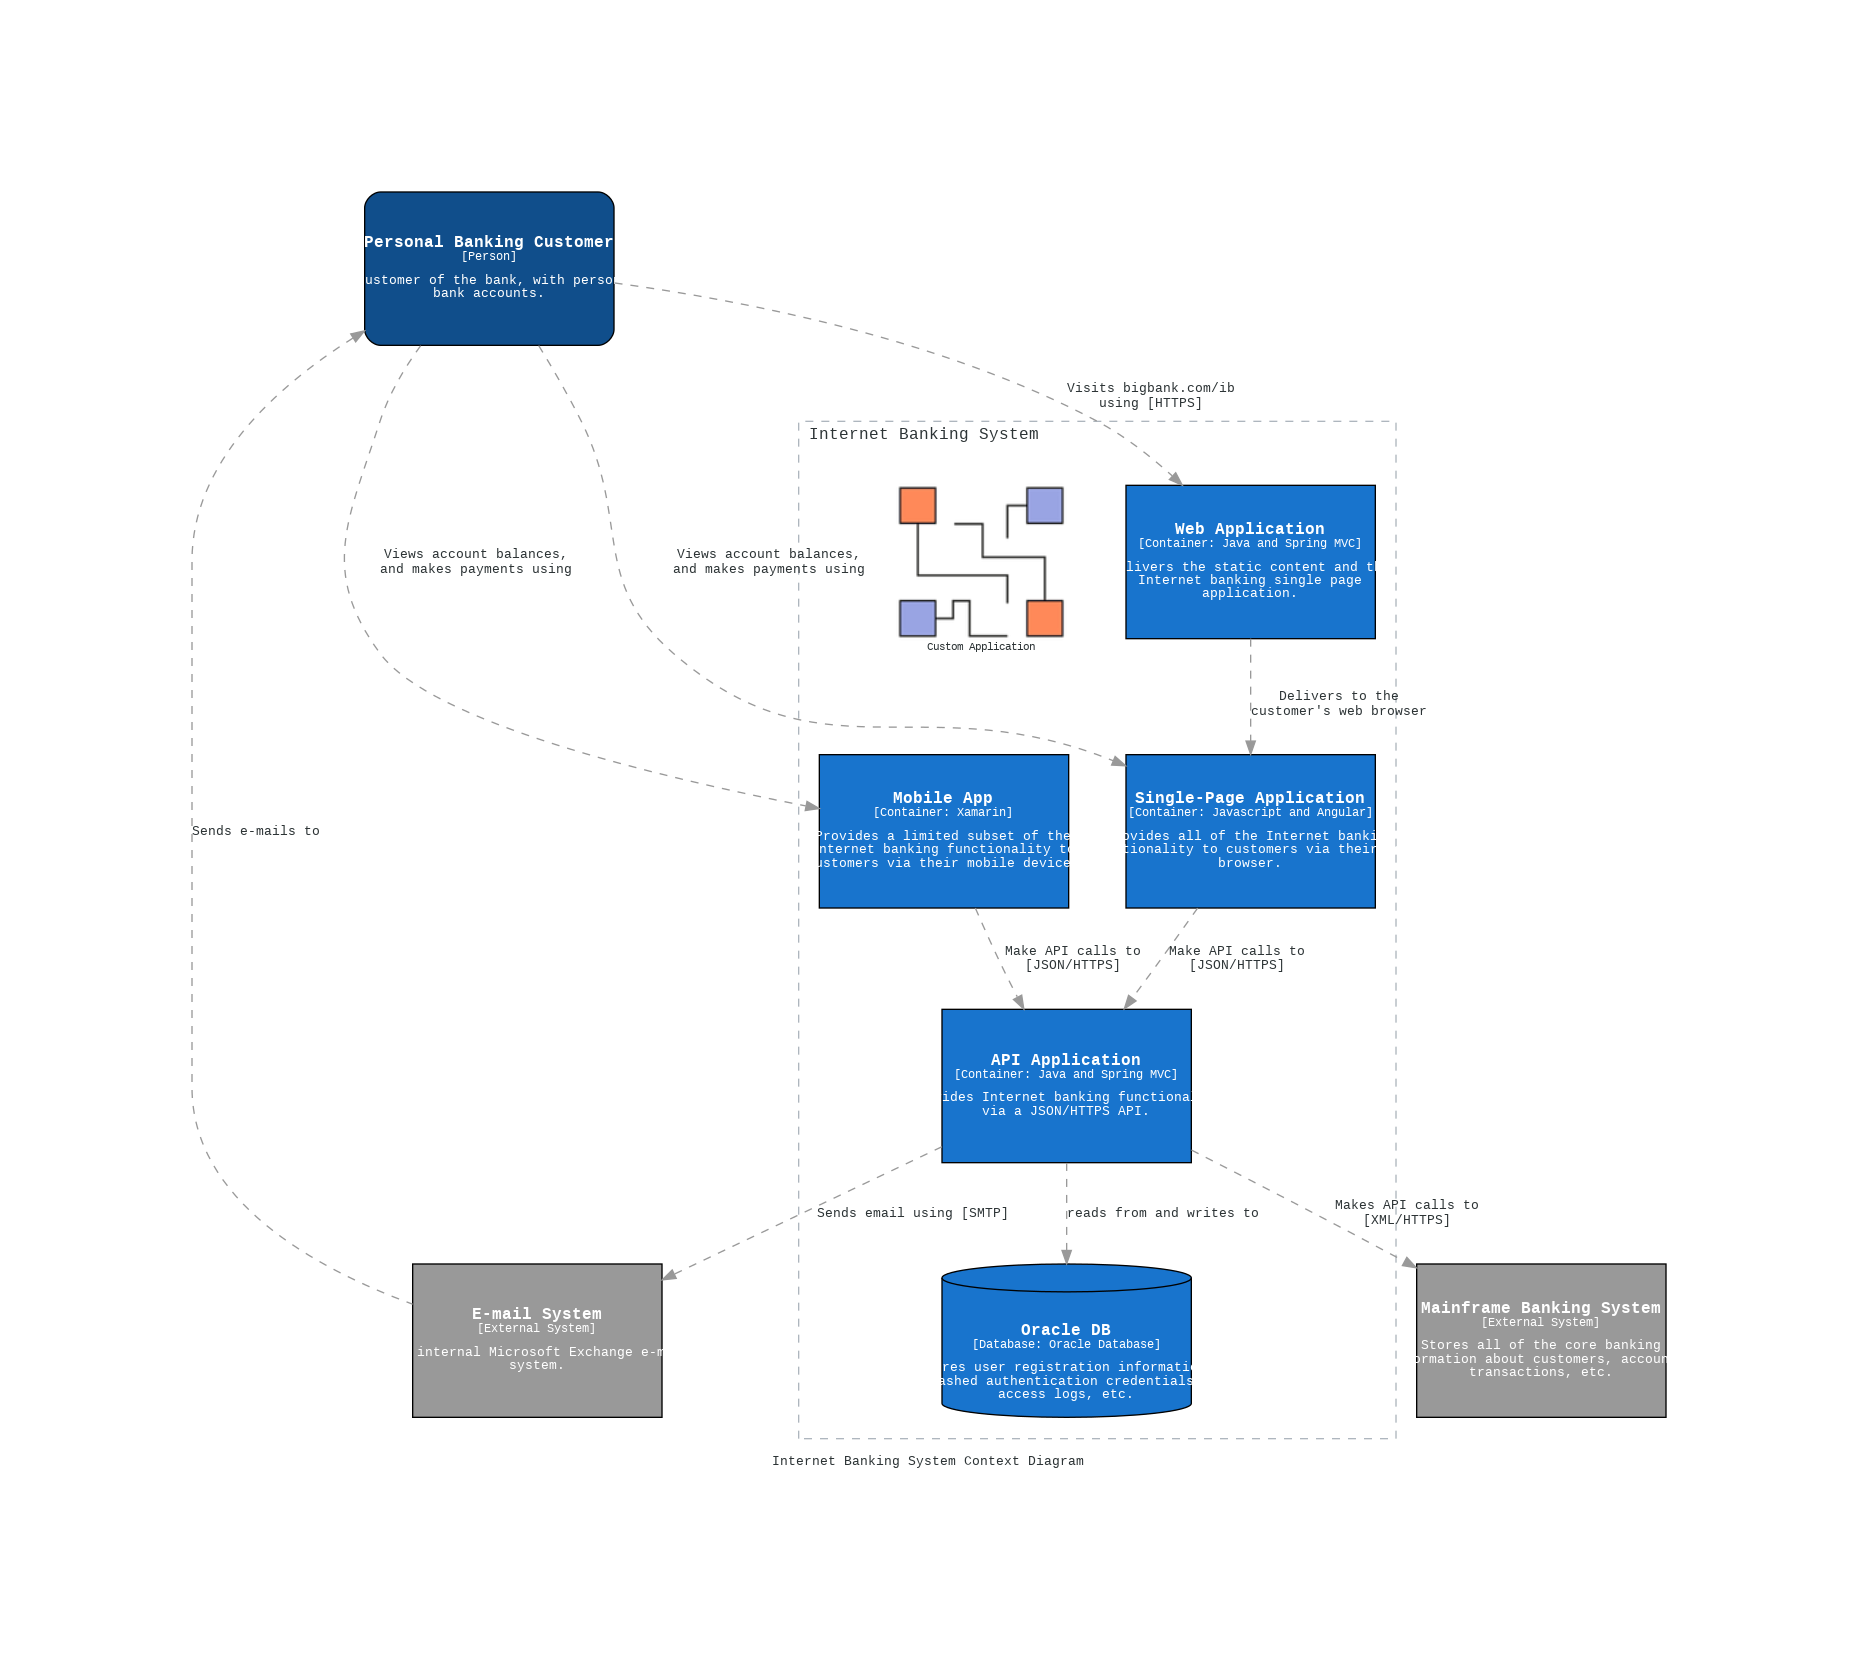

In [4]:
Image('/content/internet_banking_system_context_diagram.png')